# **📜 Cloud Computing Final Project Notebook** <br>


**Members:** <br>
Barrio, Reyjane Mae <br>
Basa, Ma. Sophia <br>
Padillo, Rodmar Kent <br>
Palmes, Jhibsam <br>
Raluto, Kier Daniel <br>
Tapao, Mark Vincent
<br>
<br>
**Course:** DS323 - Cloud Computing <br/>
**Program & Section:** BS in Data Science - DS3A

**Dataset Citations:** <br>

Pandey, P. (2020). Palmer Archipelago (Antarctica) penguin data. <a href="https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data">Kaggle.com.</a> <br>
Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

## **Importing Libraries**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
import sklearn.ensemble as ensemble
from sklearn.metrics import accuracy_score, classification_report

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv('penguins.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## **Data Preprocessing**

In [32]:
df.drop(columns = ['island','sex'], inplace = True)

In [33]:
df.rename(columns={'culmen_length_mm': 'culmen_length', 'culmen_depth_mm': 'culmen_depth', 'flipper_length_mm': 'flipper_length', 'body_mass_g': 'body_mass'}, inplace=True)

In [34]:
df.isna().sum()

species           0
culmen_length     2
culmen_depth      2
flipper_length    2
body_mass         2
dtype: int64

In [35]:
df = df.dropna()
df.head()

,species,culmen_length,culmen_depth,flipper_length,body_mass
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


In [36]:
X = df.drop('species', axis = 1)
y = df['species']

## **EDA**

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64


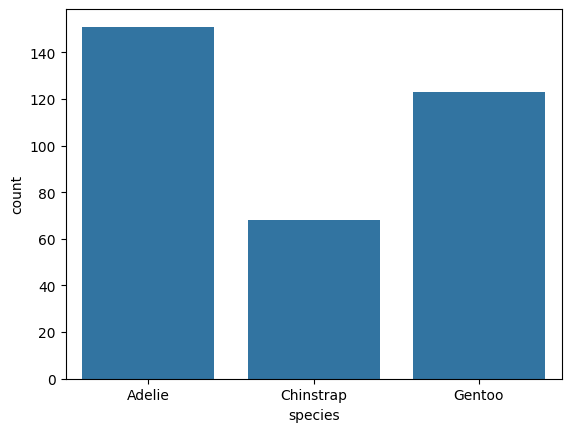

In [37]:
sns.countplot(x = y)

print(y.value_counts())

The data is a little imbalanced, so the proponents decided to apply resampling method.

**Resampling**

In [38]:
smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

species
Adelie       151
Chinstrap    151
Gentoo       151
Name: count, dtype: int64


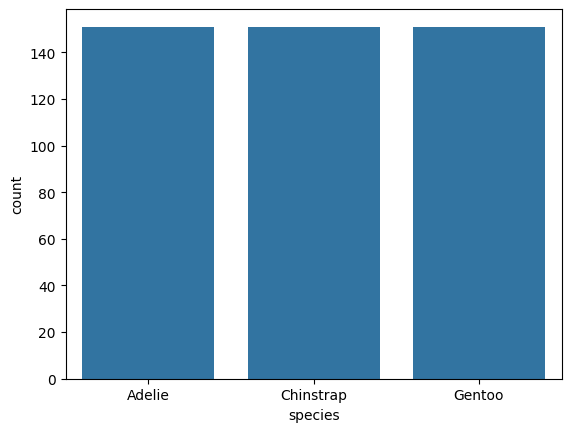

In [39]:
sns.countplot(x = y_smote)

print(y_smote.value_counts())

## **Data Splitting**

In [40]:
X_train, X_test, y_train, y_test = tts(X_smote, y_smote, test_size = 0.3, random_state = 143)

## **Model Training**

In [41]:
et = ensemble.ExtraTreesClassifier()
et.fit(X_train, y_train)
et_pred = et.predict(X_test)

In [42]:
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [43]:
gb = ensemble.GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

## **Model Evaluation**

In [44]:
print("\nExtra Trees Classifier:")
print("Accuracy score:", accuracy_score(y_test, et_pred))
print("Classification Report:\n", classification_report(y_test, et_pred))

print("\nRandom Forest Classifier:")
print("Accuracy score:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

print("\nGradient Boost Classifier:")
print("Accuracy score:", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))


Extra Trees Classifier:
Accuracy score: 0.9926470588235294
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        45
   Chinstrap       1.00      0.98      0.99        45
      Gentoo       1.00      1.00      1.00        46

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136


Random Forest Classifier:
Accuracy score: 0.9926470588235294
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        45
   Chinstrap       1.00      0.98      0.99        45
      Gentoo       1.00      1.00      1.00        46

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136


Gradient Boost Classifier:
Accuracy score: 0.9926470588235294
Class

The three (3) ensemble models got the exact same classification report results. The proponents will try to create a new model using the top 3 features and see if the result will now be different.

**Feature Importance**

In [45]:
feature_names = np.array(df.drop('species', axis = 1).columns)
def plot_feature_importance(name, coefficients):
    feature_importance_base = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    feature_importance_base['Absolute_Coefficient'] = feature_importance_base['Coefficient'].abs()
    feature_importance_base = feature_importance_base.sort_values(by = 'Absolute_Coefficient')
    
    plt.figure(figsize = (10, 6))
    plt.barh(feature_importance_base['Feature'], feature_importance_base['Absolute_Coefficient'], 
            color = plt.cm.get_cmap('tab10_r')(range(len(feature_importance_base))))
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'{name} Feature Importance')
    plt.show()
    return feature_importance_base

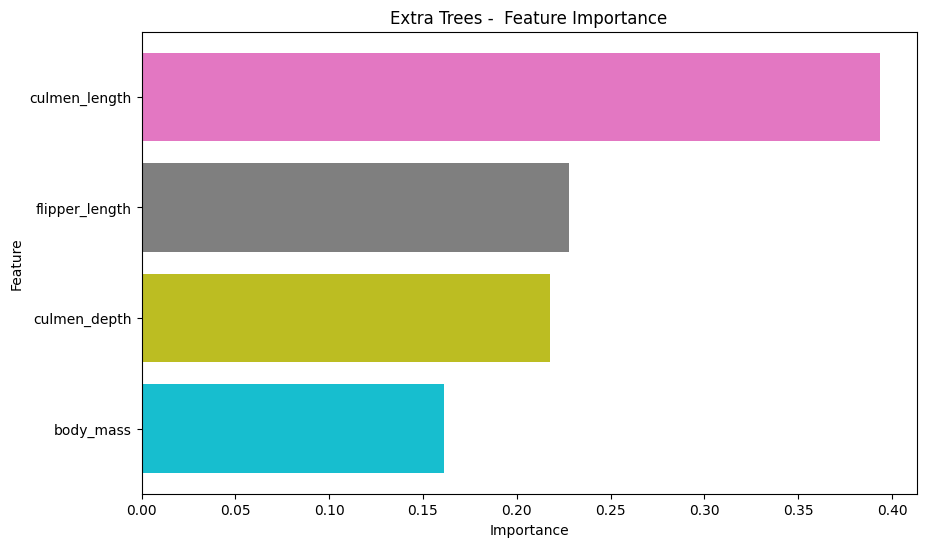

,Feature,Coefficient,Absolute_Coefficient
3,body_mass,0.161357,0.161357
1,culmen_depth,0.217484,0.217484
2,flipper_length,0.227815,0.227815
0,culmen_length,0.393343,0.393343


In [46]:
plot_feature_importance('Extra Trees - ', et.feature_importances_)

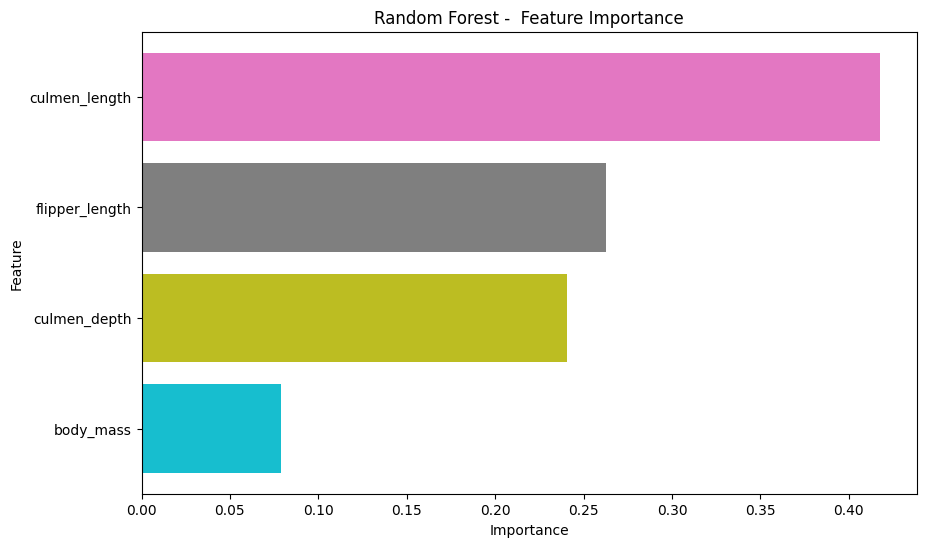

,Feature,Coefficient,Absolute_Coefficient
3,body_mass,0.079134,0.079134
1,culmen_depth,0.240451,0.240451
2,flipper_length,0.262958,0.262958
0,culmen_length,0.417457,0.417457


In [47]:
plot_feature_importance('Random Forest - ', rf.feature_importances_)

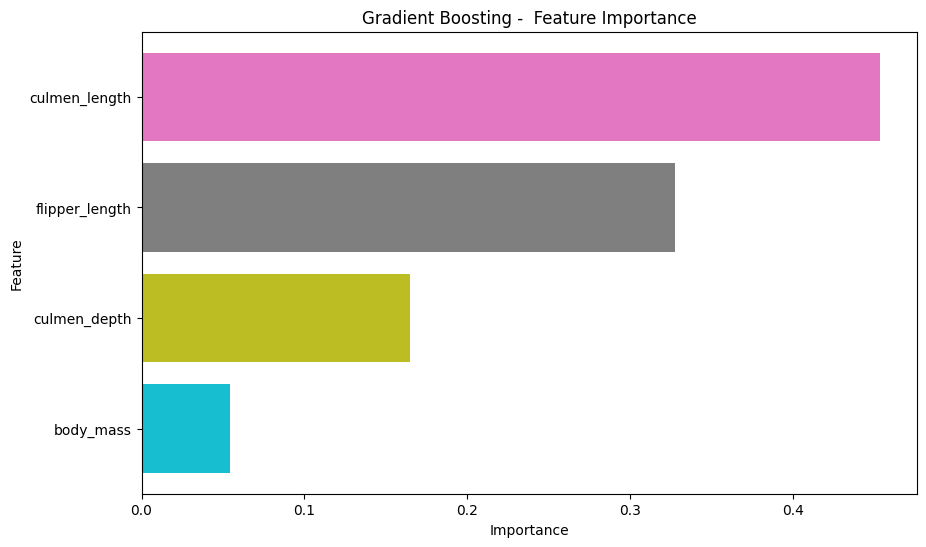

,Feature,Coefficient,Absolute_Coefficient
3,body_mass,0.054070,0.054070
1,culmen_depth,0.164991,0.164991
2,flipper_length,0.327540,0.327540
0,culmen_length,0.453400,0.453400


In [48]:
plot_feature_importance('Gradient Boosting - ', gb.feature_importances_)

Since `culmen_length`, `flipper_length`, and `culment_depth` are the top 3 features, the proponents will use them as features for the new models.

## **Model Training with Top 3 Features**

In [49]:
X = df.drop(['species', 'body_mass'], axis = 1)
y = df['species']

In [50]:
X_smote, y_smote = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = tts(X_smote, y_smote, test_size = 0.3, random_state = 143)

In [51]:
et = ensemble.ExtraTreesClassifier()
et.fit(X_train, y_train)
et_pred = et.predict(X_test)

In [52]:
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [53]:
gb = ensemble.GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

## **Model Evaluation**

In [54]:
print("\nExtra Trees Classifier:")
print("Accuracy score:", accuracy_score(y_test, et_pred))
print("Classification Report:\n", classification_report(y_test, et_pred))

print("\nRandom Forest Classifier:")
print("Accuracy score:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

print("\nGradient Boost Classifier:")
print("Accuracy score:", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))


Extra Trees Classifier:
Accuracy score: 1.0
Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        45
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        46

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136


Random Forest Classifier:
Accuracy score: 0.9852941176470589
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        45
   Chinstrap       0.98      0.98      0.98        45
      Gentoo       1.00      1.00      1.00        46

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136


Gradient Boost Classifier:
Accuracy score: 0.9926470588235294
Classification Repor

Using only the top 3 features, the `Extra Trees Classifier` got an outstanding **100% perfect accuracy!** Hence, the proponents will use this method for the model development.